In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import imghdr
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [3]:
labels = ['lilly','Lotus','Orchid','Sunflower','Tulip']
#labels = ['daisy','dandelion','rose','sunflower','tulip']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [28]:
df = get_data('C://Users//Gaura//OneDrive//Desktop//flower_images')

C:\Users\Gaura\AppData\Local\Temp\ipykernel_17360\781067335.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [5]:
df

array([[array([[[121, 126, 100],
                [123, 125,  96],
                [129, 127,  97],
                ...,
                [ 79, 115, 121],
                [ 83, 117, 123],
                [ 86, 115, 122]],

               [[119, 123,  97],
                [121, 122,  96],
                [127, 125,  95],
                ...,
                [ 83, 119, 125],
                [ 83, 119, 125],
                [ 85, 118, 124]],

               [[116, 119,  93],
                [119, 120,  94],
                [125, 122,  94],
                ...,
                [ 82, 120, 125],
                [ 84, 121, 126],
                [ 86, 121, 126]],

               ...,

               [[ 51, 159, 139],
                [ 41, 157, 137],
                [ 39, 159, 138],
                ...,
                [ 35,  71, 126],
                [ 30,  74, 125],
                [ 32,  84, 128]],

               [[ 40, 155, 136],
                [ 31, 155, 135],
                [ 38, 155, 13

Text(0.5, 1.0, 'lilly')

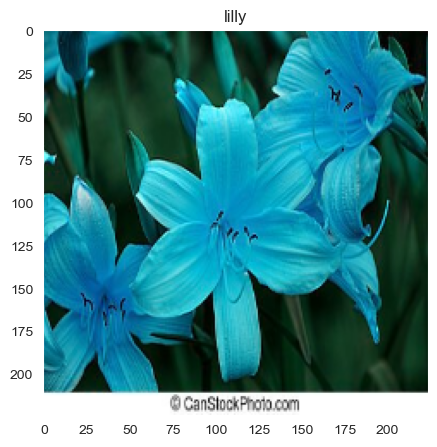

In [29]:
#plt.imshow(df[0][1],cmap='gray')
plt.figure(figsize = (5,5))
plt.imshow(df[1][0],cmap='gray')
plt.title(labels[df[0][1]])

C:\Users\Gaura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


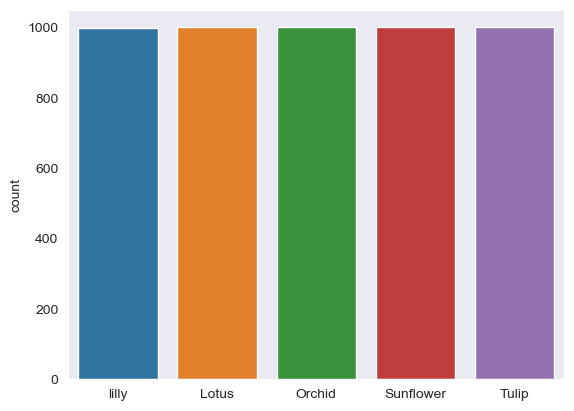

In [7]:
#Here at he 0th position there are the pixel intensity and at the 1st index we have classiffication of the flower
l = []
for i in df:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)
plt.show()

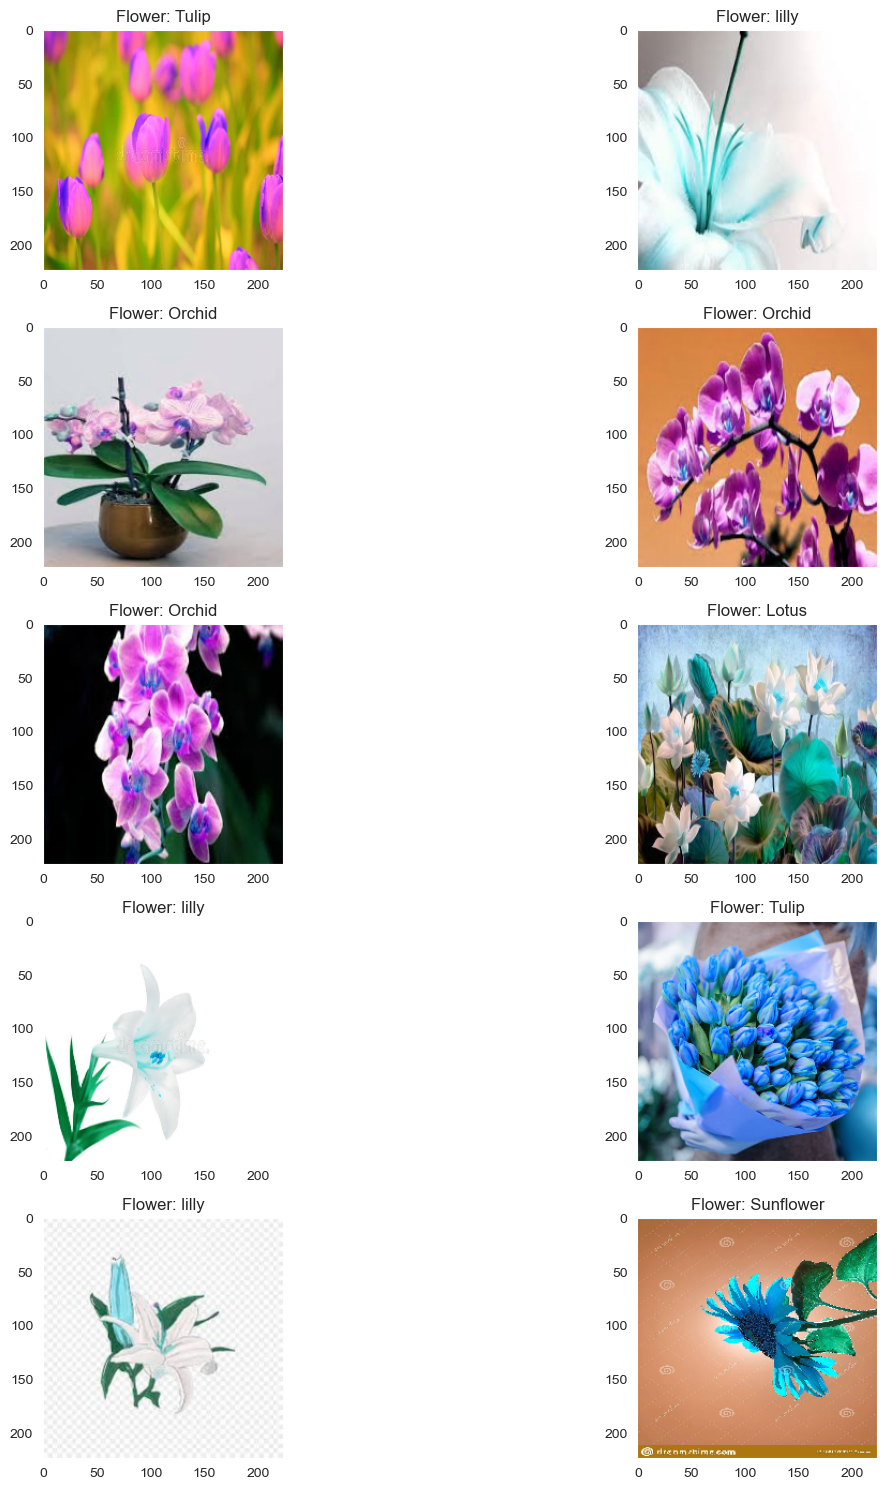

In [8]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(df))
        ax[i,j].imshow(df[l][0])
        ax[i,j].set_title('Flower: '+labels[df[l][1]])
        
plt.tight_layout()

In [18]:
x = []
y = []

for feature, label in df:
    x.append(feature)
    y.append(label)

In [10]:
# Normalize the data
#Because it is easy to converg the values from 0-1 rather than 1-255
x = np.array(x) / 255

In [16]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int32)

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
#Label Binarizer is an SciKit Learn class that accepts Categorical data as input 
#and returns an Numpy array. Unlike Label Encoder, it encodes the data into dummy variables indicating
#the presence of a particular label or not. Encoding make column data using Label Binarizer.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 0)

In [45]:
#if the image is tilted or zoomed out or not in a proper order then we will be passing it to the 
#image data generator 

In [21]:
gen=ImageDataGenerator(
                        #rescale=1/255,
                        shear_range=0.2,     # if some images are slanted then this will be rotated 20deg
                        zoom_range=0.2,      # if some of the images are shrinked then this is going to zoom it by 20%
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                        horizontal_flip = True)

In [22]:
gen.fit(x_train)

In [49]:
#Building the Model

In [23]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization, Dropout
from keras.layers import Conv2D

In [24]:
classifier=Sequential()
#Input Convolution layer
classifier.add(Conv2D(filters=32,padding='same',kernel_size=3,activation='relu',input_shape=[224,224,3])) 
classifier.add(BatchNormalization())
#building our first layer
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the second convolution layer
classifier.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the third convolution layer
classifier.add(Conv2D(filters=64,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the forth convolution layer
classifier.add(Conv2D(filters=128,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

#adding the fifth convolution layer
classifier.add(Conv2D(filters=256,padding='same',kernel_size=3,activation='relu')) #building our first layer
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=2,strides=2,padding='same')) # adding the pooling

classifier.add(Flatten()) #flattening the image before we fit the data

#adding the Dense layer to the neurons
from keras.layers import Dense
classifier.add(Dense(units=128,activation='relu')) #hidden layer with the 128 Neuron
classifier.add(Dense(units=5,activation='softmax')) #output layer with one neuron

In [26]:
#compilation of the model
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
classifier.fit(gen.flow(x_train,y_train,batch_size=64),
                          epochs=10,
                          validation_data=gen.flow(x_test,y_test))

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (224, 224, 3), y.shape = (3998, 5)

In [37]:
print("Loss of the model is - " , classifier.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , classifier.evaluate(x_test,y_test)[1]*100 , "%")

32/32 [==============================] - 8s 248ms/step - loss: 0.6485 - accuracy: 0.8160
Loss of the model is -  0.6484991312026978
32/32 [==============================] - 8s 243ms/step - loss: 0.6485 - accuracy: 0.8160
Accuracy of the model is -  81.5999984741211 %


In [46]:
predictions = classifier.predict(x_test)
for i in range(len(predictions)):
    predictions[i]=1 if predictions[i]>0.5 else 0
    #print(predictions[i])
predictions[:5]

32/32 [==============================] - 7s 207ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [43]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [44]:
print(classification_report(y_test_inv, predictions, target_names = labels))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets